# Ecommerce Company Data Analysis

This Project is about a Ecommerce company that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.The company is trying to decide whether to focus their efforts on their mobile app experience or their website. 

We'll work with the Ecommerce Customers csv file from the company. It has Customer info, suchas Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 

## Data And Setup

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

sns.set_style('whitegrid')
sns.set_palette("GnBu_d")
plt.rcParams["patch.force_edgecolor"] = True

ecomm = pd.read_csv('Ecommerce Customers')
ecomm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


In [15]:
ecomm.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


## Exploratory Data Analysis

**Let's explore the data!**
___
**Lets use seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns. Does the correlation make sense?**

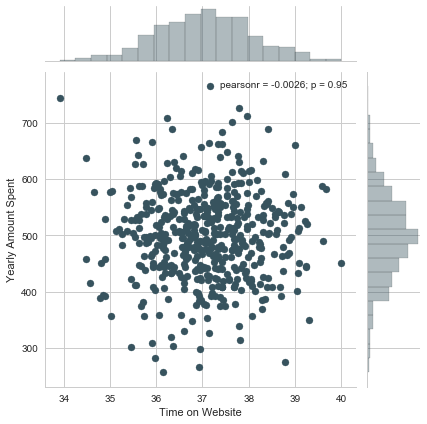

In [21]:
sns.jointplot(data=ecomm, x='Time on Website', y='Yearly Amount Spent')

**Lets Do the same but with the Time on App column instead.**

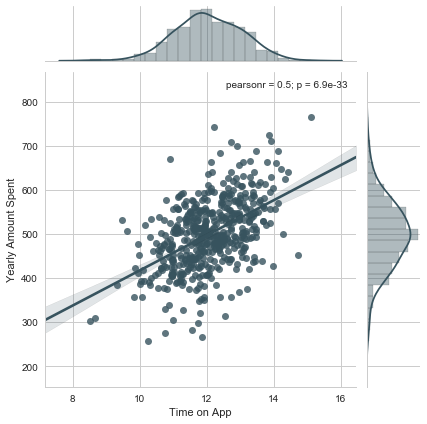

In [20]:
sns.jointplot(data=ecomm, x='Time on App', y='Yearly Amount Spent', kind='reg')

**Lets Use jointplot to create a 2D hex bin plot comparing Time on App and Length of Membership.**

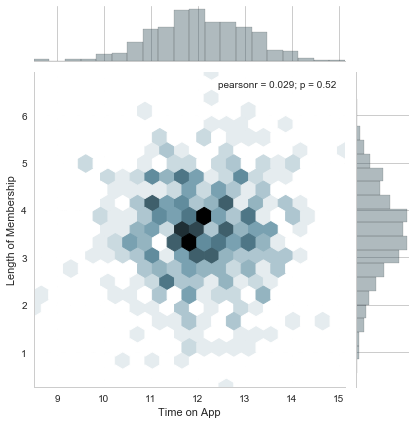

In [23]:
sns.jointplot(data=ecomm, x='Time on App', y='Length of Membership', kind='hex')

**Let's explore these types of relationships across the entire data set.**

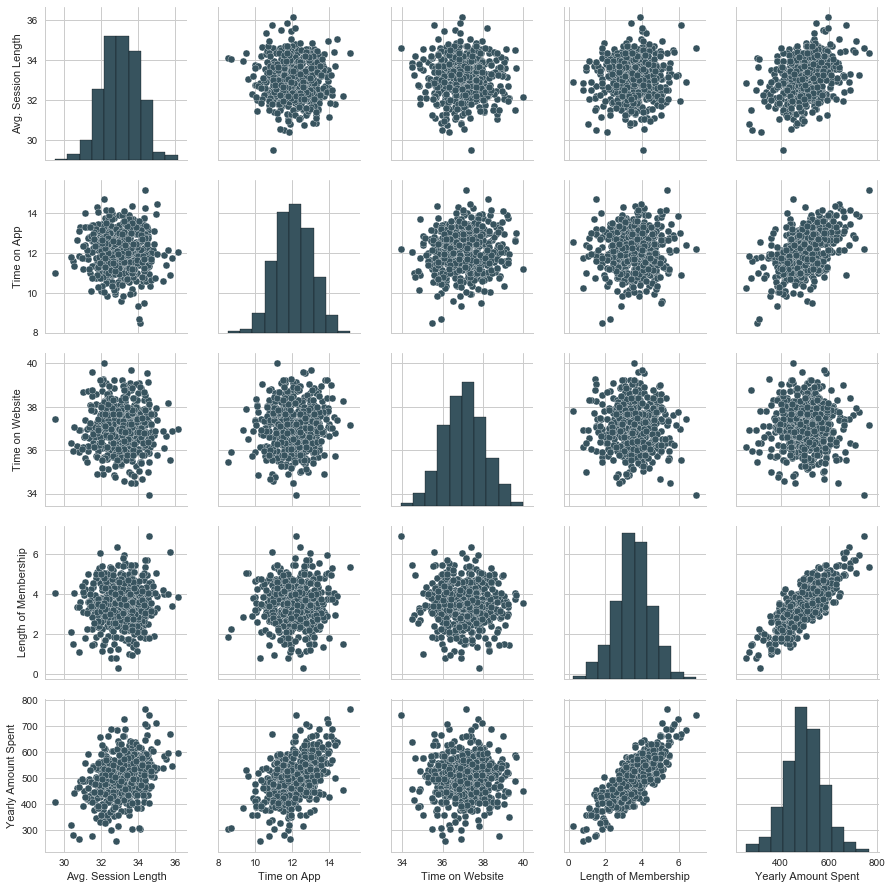

In [25]:
sns.pairplot(ecomm)

**Based off this plot Length Of Membership looks to be the most correlated feature with Yearly Amount Spent, So lets Create a linear model plot (using seaborn's lmplot) of  Yearly Amount Spent vs. Length of Membership.**

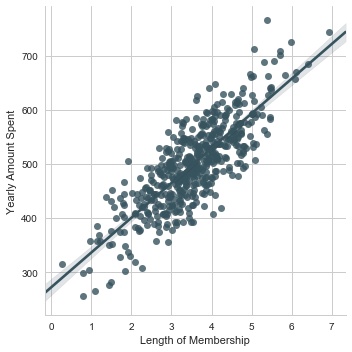

In [26]:
sns.lmplot(data=ecomm, x='Length of Membership', y='Yearly Amount Spent')

## Training and Testing Data

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.
** Set a variable X equal to the numerical features of the customers and a variable y equal to the "Yearly Amount Spent" column. **

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [34]:
x = ecomm[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]
y = ecomm['Yearly Amount Spent']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

## Training the Model

Now its time to train our model on our training data!


In [36]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

**Print out the coefficients of the model**

In [37]:
model.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!

In [38]:
pred = model.predict(x_test)

**let's create a scatterplot of the real test values versus the predicted values. **

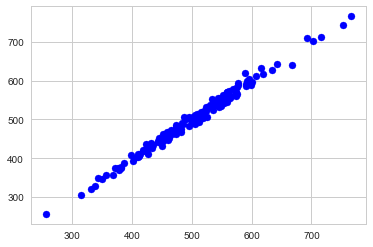

In [40]:
plt.scatter(pred, y_test, c='blue')

## Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

In [43]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 7.228148653430815
MSE: 79.81305165097429
RMSE: 8.933815066978624


In [50]:
print('Explained variance score (R^2): ',metrics.explained_variance_score(pred, y_test))

Explained variance score (R^2):  0.9887793678920463


## Conclusion
We still want to figure out the answer to the original question, do we focus our efforst on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important.  Let's see if we can interpret the coefficients at all to get an idea.


In [47]:
pd.DataFrame(model.coef_,x.columns, columns=['Coeff'])

,Coeff
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


** How can you interpret these coefficients? **

- Holding all other features fixed, a 1 unit increase in **Avg. Session Length** is associated with an **increase of 25.98 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on App** is associated with an **increase of 38.59 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on Website** is associated with an **increase of 0.19 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Length of Membership** is associated with an **increase of 61.27 total dollars spent**.

**Should Company focus more on their mobile app or on their website?**

This is tricky, there are two ways to think about this: Develop the Website to catch up to the performance of the mobile app, or develop the app more since that is what is working better. This sort of answer really depends on the other factors going on at the company, you would probably want to explore the relationship between Length of Membership and the App or the Website before coming to a conclusion!